In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib

In [195]:
SMALL_SIZE = 15
MEDIUM_SIZE = 15
BIGGER_SIZE = 20
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE) 

In [181]:
sns.set_style("whitegrid",{"grid.linestyle": "--"})

In [160]:
pd.set_option('display.max_columns', None)

In [161]:
df = pd.read_csv('../Data_clean/Final_Train/IPO_train.csv')

In [162]:
df['Trade_Date'] = pd.to_datetime(df['Trade_Date'])

In [163]:
df

,IPO_index,Trade_Date,Issuer,Symbol,Lead/Joint-Lead_ Managers,Offer_Price,Opening_Price,1st Day_Close,1st_Day_Return,change_open,change_close,Star_Ratings,Performed,year,CUSIP,Offer Date,IPO Name,Ticker,VC Dummy,Rollup dummy,CRSP PERM,Dual dummy,Internet dummy,Post-Issue shares,Founding,uw_max_rank,top_tier_uw,month,avg_net_ipo,num_ipo,net_num_ipo,perc_price_above,ASVI,mean_SVI,week_-9,week_-8,week_-7,week_-6,week_-5,week_-4,week_-3,week_-2,week_-1,week_0,week_1,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,firm_age
0,0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.089286,0.75,-1.25,2,0,2020.0,44975P103,2020-01-17,I-MAB,IMAB,0,.,19193,1,0,131239439,2014.0,8.501,1,1.0,45.0,13.0,6.0,0.33,0.955511,11.750,13.0,20.0,7.0,13.0,7.0,0.0,0.0,21.0,26.0,100.0,51.0,19.0,25.0,32.0,6.0,12.0,6.0,12.0,30.0,6.0
1,1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.057273,0.03,0.63,1,0,2020.0,53933L104,2020-01-17,Lizhi Inc,LIZI,1,.,19195,1,0,914661090,2010.0,9.001,1,1.0,45.0,13.0,6.0,0.33,0.087011,20.875,27.0,28.0,21.0,14.0,16.0,11.0,30.0,23.0,24.0,100.0,29.0,39.0,23.0,23.0,28.0,33.0,17.0,22.0,34.0,10.0
2,2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.000000,0.00,0.00,1,0,2020.0,719156101,2020-01-17,Phoenix Tree Holdings Ltd,DNK,0,.,19168,1,0,1825796852,2015.0,9.001,1,1.0,45.0,13.0,6.0,0.33,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.039231,0.85,0.51,1,0,2020.0,92262D101,2020-01-17,Velocity Financial LLC,VEL,1,0,19172,0,0,.,2004.0,9.001,1,1.0,45.0,13.0,6.0,0.33,1.098612,26.750,22.0,57.0,6.0,22.0,11.0,40.0,0.0,18.0,60.0,100.0,48.0,16.0,37.0,11.0,32.0,47.0,41.0,25.0,35.0,16.0
4,4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045000,0.52,0.45,1,0,2020.0,382865103,2020-01-24,Gores Holdings IV Inc,GHIVU,0,0,19312,1,0,50000000,2019.0,8.501,1,1.0,45.0,13.0,6.0,0.33,13.592368,2.125,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2674,2674,2004-12-15,Cambridge Display Technology,OLED,SG Cowen,12.0,12.70,11.27,-0.060833,0.70,-0.73,1,0,2004.0,132193103,2004-12-15,Cambridge Display Technology,OLED,0,0,90485,0,0,.,1992.0,0.000,0,12.0,15.6,36.0,23.0,0.59,15.501910,26.875,0.0,0.0,100.0,29.0,0.0,32.0,0.0,0.0,54.0,82.0,32.0,0.0,27.0,50.0,0.0,49.0,0.0,50.0,48.0,12.0
2675,2675,2004-12-15,Advance America Cash Advance,AEA,Morgan Stanley,15.0,20.50,20.50,0.366667,5.50,5.50,3,0,2004.0,00739W107,2004-12-15,Advance Amer Cash Advance Ctrs,AEA,0,0,90493,0,0,.,1997.0,9.001,1,12.0,15.6,36.0,23.0,0.59,0.655876,44.625,26.0,42.0,49.0,64.0,62.0,0.0,21.0,40.0,79.0,20.0,24.0,84.0,60.0,55.0,55.0,73.0,36.0,37.0,53.0,7.0
2676,2676,2004-12-15,Arbinet-thexchange,ARBX,Merrill Lynch/Lehman Brothers,17.5,26.85,29.00,0.657143,9.35,11.50,3,0,2004.0,03875P100,2004-12-16,ARBINET THEXCHANGE INC,ARBX,1,0,90469,0,1,.,1996.0,0.000,0,12.0,15.6,36.0,23.0,0.59,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
2677,2677,2004-12-15,KMG AMERICA,KMA,Friedman Billings Ramsey,9.5,10.50,10.80,0.136842,1.00,1.30,2,0,2004.0,482563103,2004-12-15,KMG America Corp,KMA,0,0,90504,0,0,.,1991.0,5.001,0,12.0,15.6,36.0,23.0,0.59,14.690980,3.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,100.0,59.0,0.0,25.0,0.0,45.0,22.0,0.0,23.0,0.0,13.0


In [164]:
df['positive_return'] = 0
df.loc[df['1st_Day_Return'] >0 , 'positive_return'] = 1

In [202]:
#feature & outcome set 
features = ['Star_Ratings','VC Dummy','Internet dummy',
            'top_tier_uw','perc_price_above','ASVI','mean_SVI',
            'week_-8','week_-7','week_-6','week_-5','week_-4','week_-3','week_-2','week_-1',
            'firm_age']
y = ['1st_Day_Return']

In [203]:
#summary statistics of each features and return 
df[y + features].describe().round(4)

,1st_Day_Return,Star_Ratings,VC Dummy,Internet dummy,top_tier_uw,perc_price_above,ASVI,mean_SVI,week_-8,week_-7,week_-6,week_-5,week_-4,week_-3,week_-2,week_-1,firm_age
count,2679.0000,2679.0000,2679.0000,2679.0000,2679.0000,2679.0000,2679.0000,2679.0000,2679.0000,2679.0000,2679.0000,2679.0000,2679.0000,2679.0000,2679.0000,2679.0000,2679.0000
mean,0.1360,1.7753,0.4423,0.1045,0.6514,0.3933,2.8715,21.5357,17.2971,17.4957,17.9933,18.4076,19.7525,20.8589,24.7693,35.7115,16.1762
std,0.2679,0.8583,0.4968,0.3060,0.4766,0.2065,6.3470,20.9508,24.6671,24.6380,25.0129,24.9750,25.0460,25.7807,27.6594,32.2023,23.8520
min,-0.4108,1.0000,0.0000,0.0000,0.0000,0.0000,-15.5560,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,1.0000,0.0000,0.0000,0.0000,0.2500,0.0000,5.3750,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000
50%,0.0490,2.0000,0.0000,0.0000,1.0000,0.4100,0.3211,15.8750,0.0000,0.0000,3.0000,4.0000,8.0000,11.0000,17.0000,32.0000,8.0000
75%,0.2118,3.0000,1.0000,0.0000,1.0000,0.5300,1.5289,31.8750,28.0000,30.0000,30.0000,32.0000,34.0000,35.0000,42.0000,59.0000,17.0000
max,3.5385,4.0000,1.0000,1.0000,1.0000,1.0000,16.1181,95.5000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,224.0000


<AxesSubplot:xlabel='1st_Day_Return', ylabel='Count'>

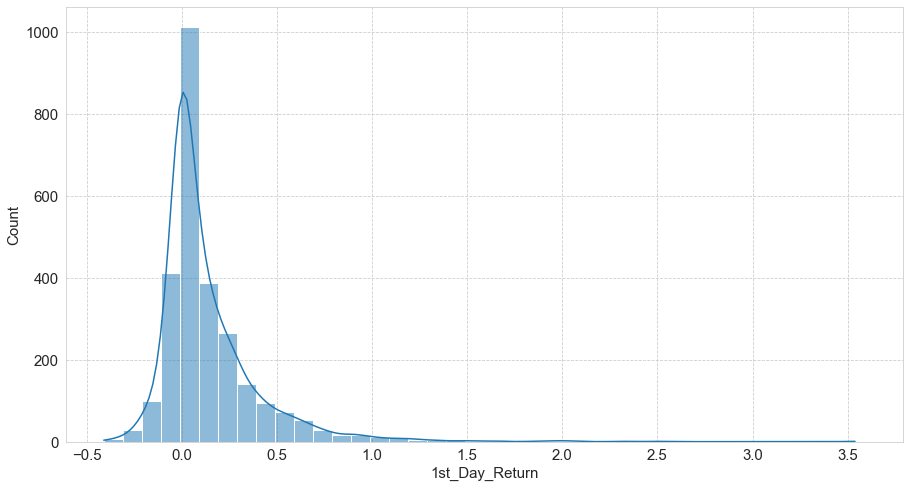

In [196]:
#the distibution of first day return 
plt.figure(figsize=(15,8))
sns.histplot(data = df, x = '1st_Day_Return', binwidth= 0.1 , kde = True)

/Users/nianyun/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1604: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  barfunc(barpos, self.statistic, self.width,


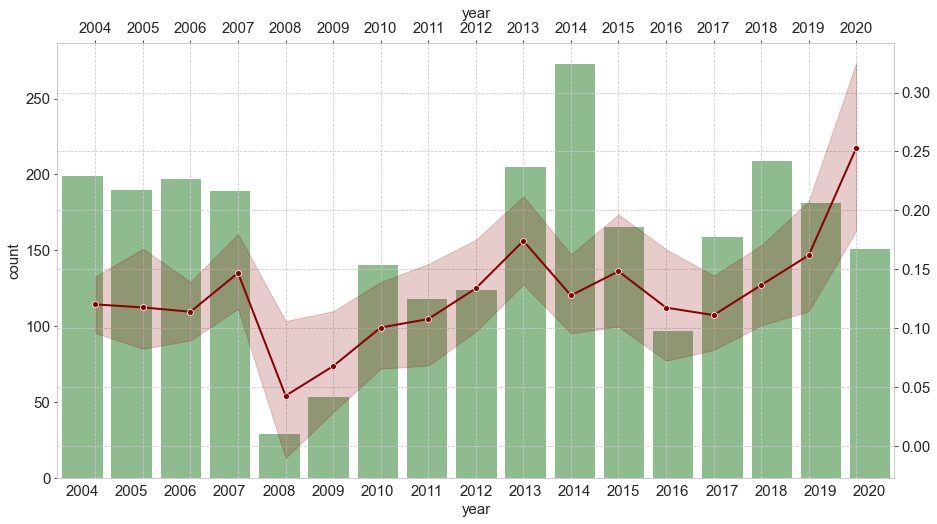

In [197]:
#plot the time series
#point not center because the mirroed axis is not aligned with another axis 
#IPO first day return and number of IPO per year 
x = df['year'].value_counts().reset_index().rename(columns = {'index':  'year', 'year' :'count'})
x['year']= x['year'].astype(int)
fig, ax = plt.subplots(figsize=(15,8))
ax2 =  ax.twinx().twiny()
bar = sns.barplot(data = x , x = 'year' , y = 'count', ax = ax , Color = 'darkseagreen')
line = sns.lineplot(data = df , x = 'year' , y = '1st_Day_Return' , ax = ax2 , color = 'darkred' , marker = 'o' , linewidth=2)
ax2.set_xticks(sorted([int(i) for i in df['year'].unique()]))
bar.grid(False)
plt.show()

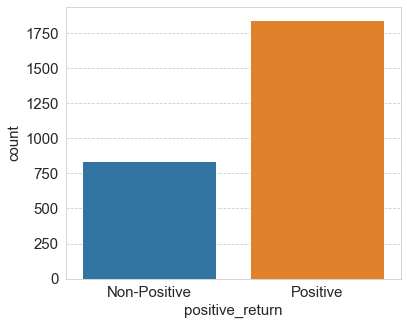

In [198]:
#plot the distribution of 
fig, ax = plt.subplots(figsize=(6,5))
sns.countplot( data = df, x = 'positive_return')
ax.set_xticklabels(['Non-Positive', 'Positive'])
plt.show()

In [170]:
#plot average weekly google trend 8 weeks before and after IPO prior and after IPO week 
google_trend = df[ ['IPO_index'] + [col for col in df.columns if col.startswith('week') and not col.endswith('9')]].copy()

In [171]:
google_trend = google_trend.melt(id_vars=["IPO_index"], var_name="relative_week", value_name="SVI")

In [172]:
google_trend.head()

,IPO_index,relative_week,SVI
0,0,week_-8,20.0
1,1,week_-8,28.0
2,2,week_-8,0.0
3,3,week_-8,57.0
4,4,week_-8,0.0


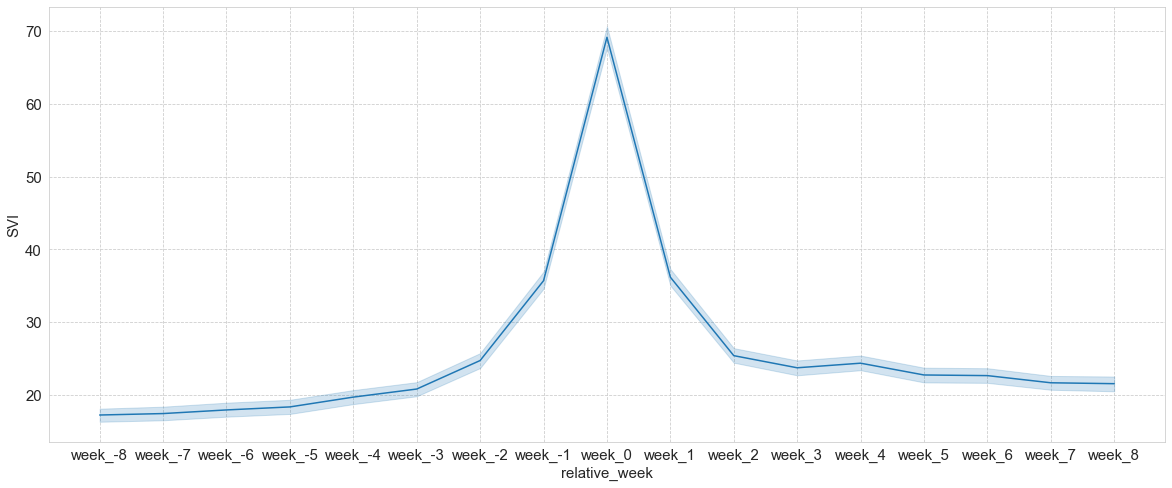

In [200]:
#plot the average SVI 
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data = google_trend, x= 'relative_week' , y = 'SVI')
plt.show()

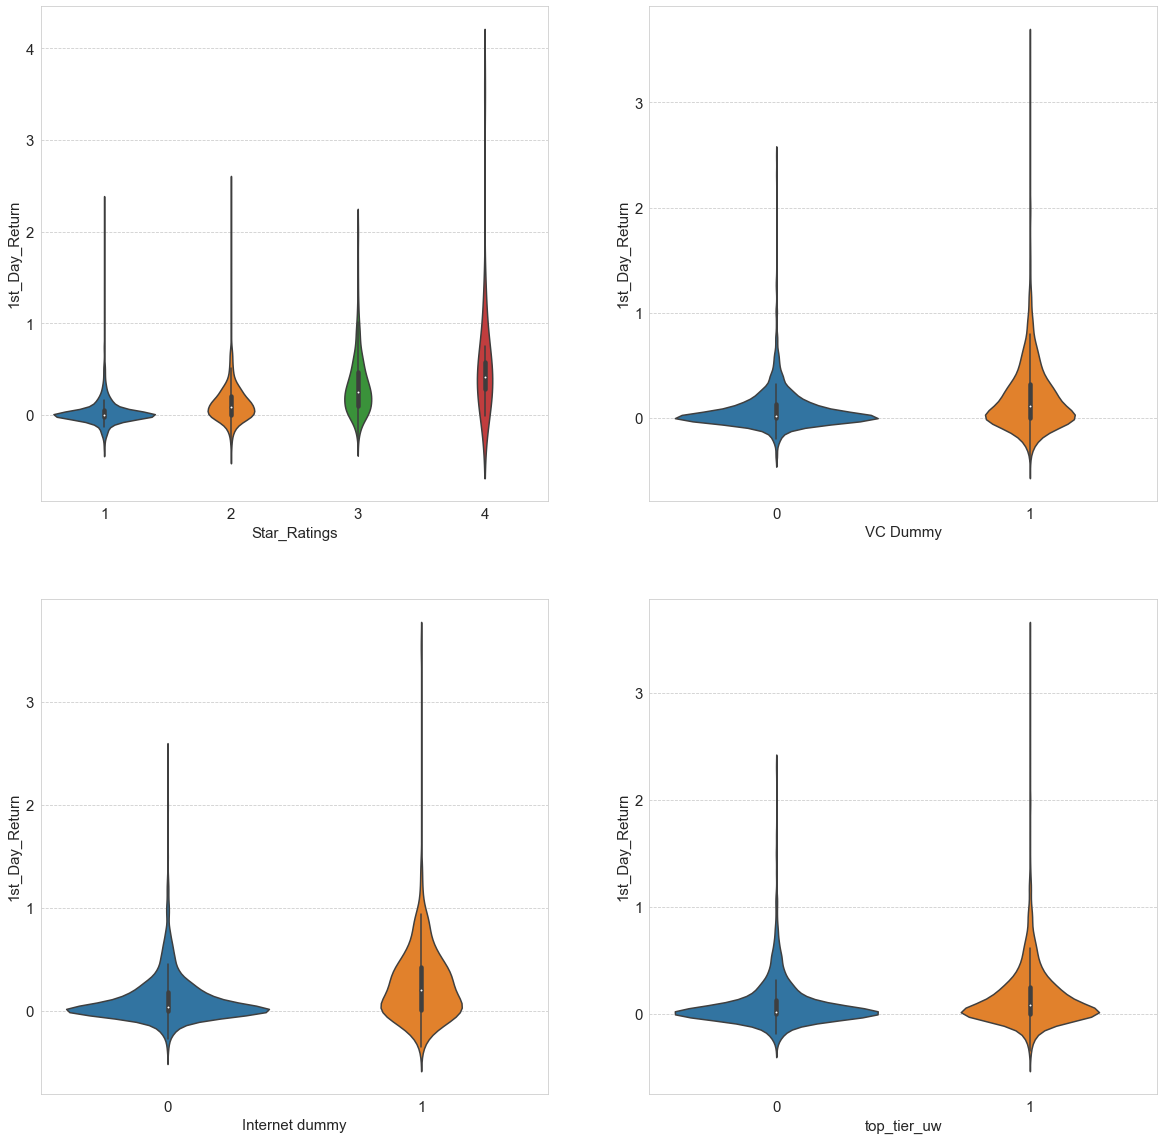

In [211]:
#plot the correlation btween return and features
# sns.scatterplot(data=df, x=features[0], y="1st_Day_Return")
fig,axes = plt.subplots(2,2,figsize=(20,20), sharey = False)
sns.violinplot(data=df, x='Star_Ratings', y="1st_Day_Return", ax = axes[0,0])
sns.violinplot(data=df, x='VC Dummy', y="1st_Day_Return", ax = axes[0,1])
sns.violinplot(data=df, x='Internet dummy', y="1st_Day_Return", ax = axes[1,0])
sns.violinplot(data=df, x='top_tier_uw', y="1st_Day_Return", ax = axes[1,1])
# for row in [0,1]:
#     for col in [0,1]:
#         axes[row,col].tick_params(axis = 'both', labelsize = 20)
plt.show()

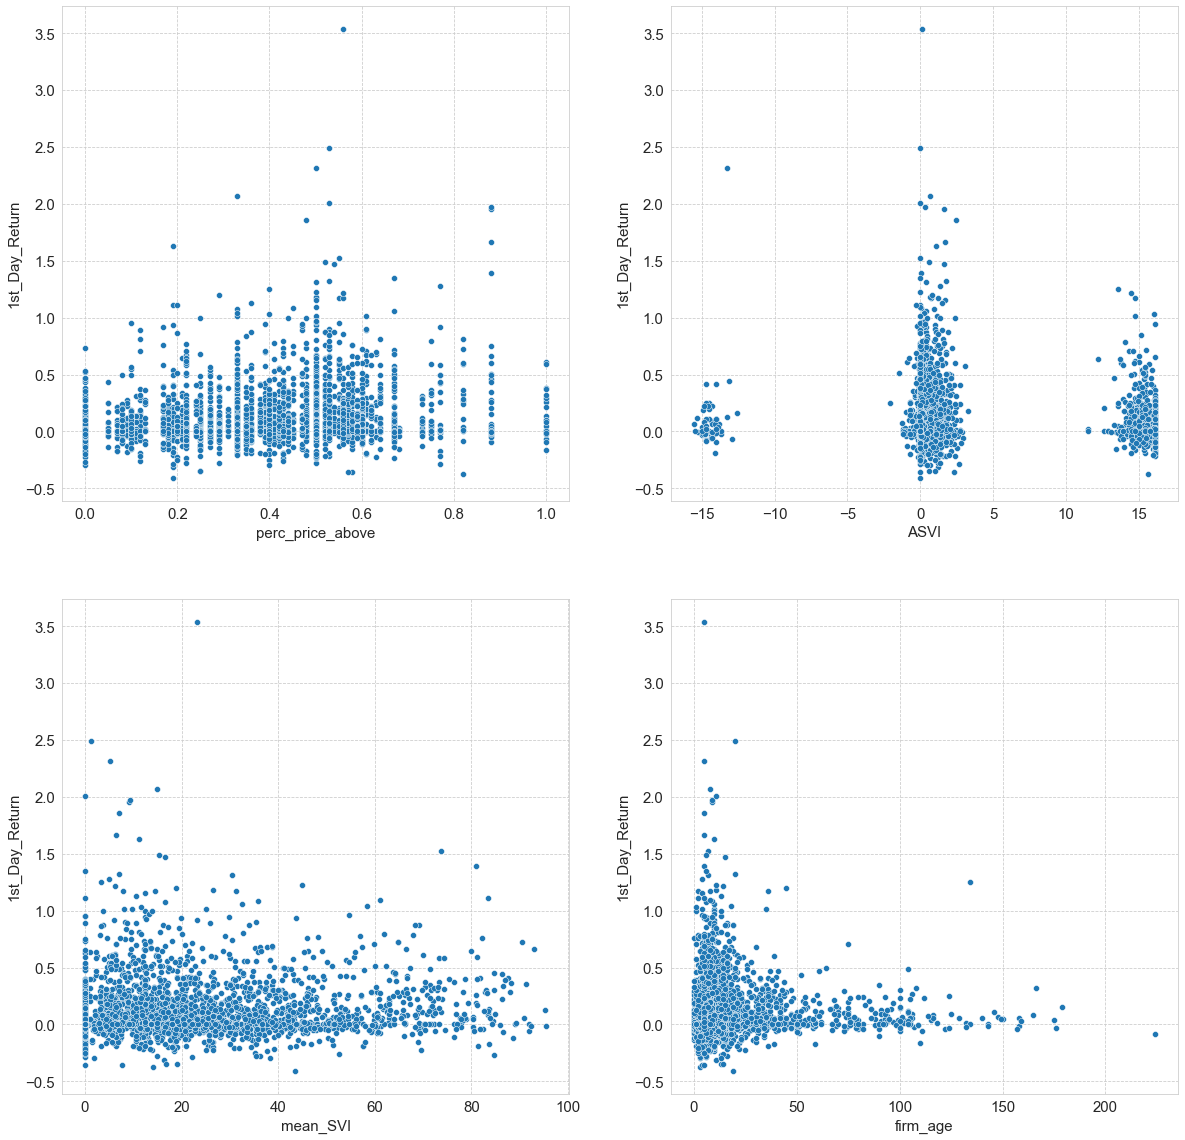

In [208]:
#plot the correlation btween return and features
# sns.scatterplot(data=df, x=features[0], y="1st_Day_Return")
fig,axes = plt.subplots(2,2,figsize=(20,20), sharey = False)
sns.scatterplot(data=df, x="perc_price_above", y="1st_Day_Return" , ax = axes[0,0])
sns.scatterplot(data=df, x="ASVI", y="1st_Day_Return" ,  ax = axes[0,1])
sns.scatterplot(data=df, x="mean_SVI", y="1st_Day_Return" ,  ax = axes[1,0])
sns.scatterplot(data=df, x="firm_age", y="1st_Day_Return" ,  ax = axes[1,1])
plt.show()

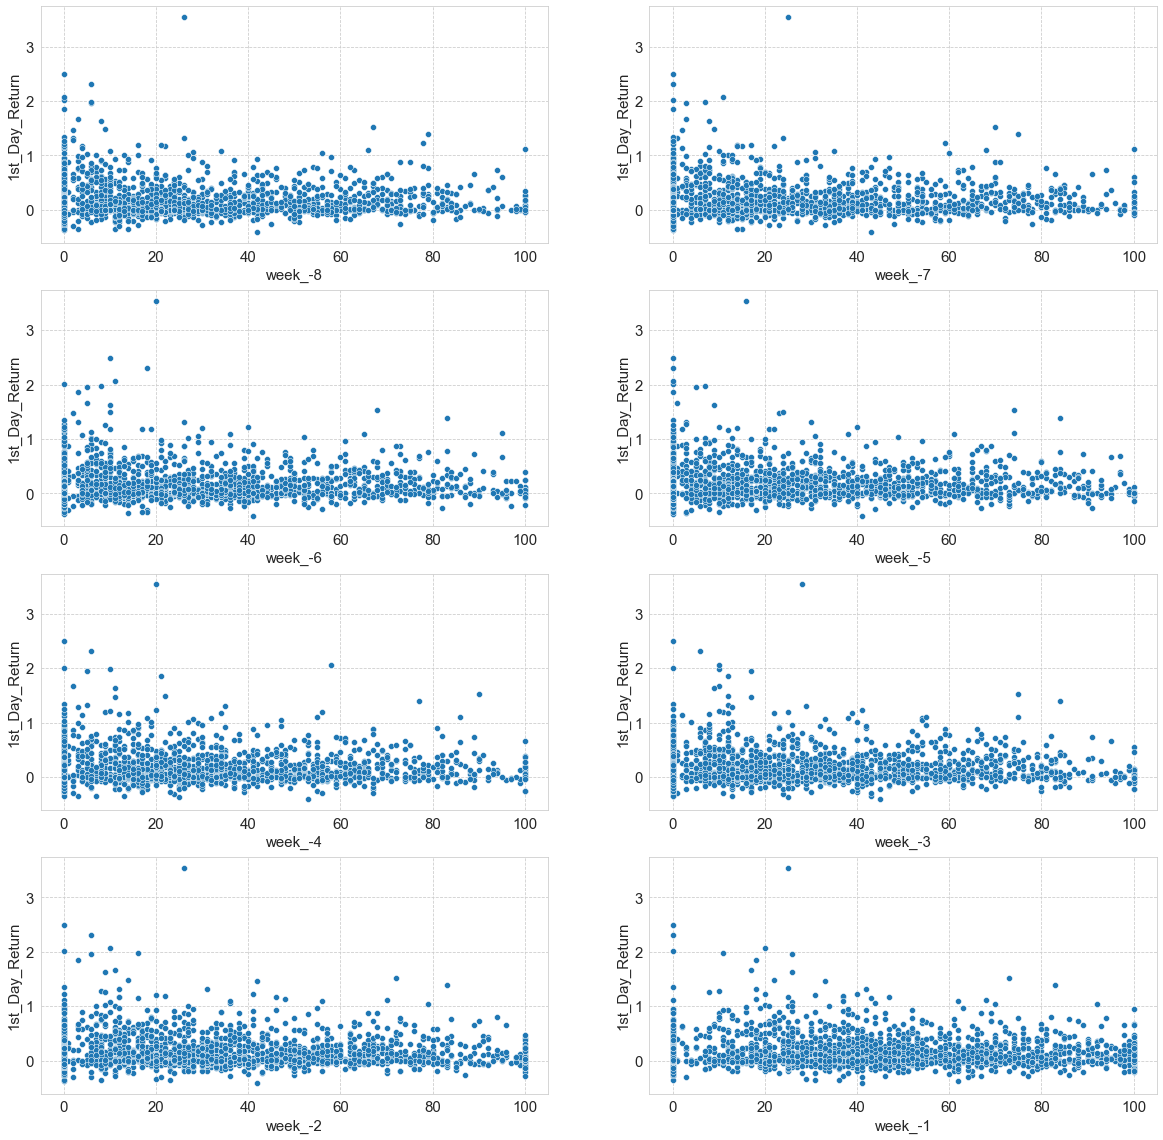

In [209]:
#plot the correlation btween return and features
# 8 weeks before
fig,axes = plt.subplots(4,2,figsize=(20,20), sharey = False)
sns.scatterplot(data=df, x="week_-8", y="1st_Day_Return" , ax = axes[0,0])
sns.scatterplot(data=df, x="week_-7", y="1st_Day_Return" ,  ax = axes[0,1])
sns.scatterplot(data=df, x="week_-6", y="1st_Day_Return" ,  ax = axes[1,0])
sns.scatterplot(data=df, x="week_-5", y="1st_Day_Return" ,  ax = axes[1,1])
sns.scatterplot(data=df, x="week_-4", y="1st_Day_Return" ,  ax = axes[2,0])
sns.scatterplot(data=df, x="week_-3", y="1st_Day_Return" ,  ax = axes[2,1])
sns.scatterplot(data=df, x="week_-2", y="1st_Day_Return" ,  ax = axes[3,0])
sns.scatterplot(data=df, x="week_-1", y="1st_Day_Return" ,  ax = axes[3,1])
plt.show()

In [ ]:
##anything change if divide by positive and non-positive

In [ ]:
features = ['Star_Ratings','VC Dummy','Internet dummy',
            'top_tier_uw','perc_price_above','ASVI','mean_SVI',
            'week_-8','week_-7','week_-6','week_-5','week_-4','week_-3','week_-2','week_-1',
            'firm_age']

In [ ]:
sns.scatterplot(data=tips, x="total_bill", y="tip")

In [147]:
df['VC Dummy'].value_counts()

0    1508
1    1075
2     116
.       1
Name: VC Dummy, dtype: int64

In [124]:
google_trend.loc[google_trend['IPO_index'] == 0]

,IPO_index,relative_week,SVI
0,0,week_-8,20.0
2700,0,week_-7,7.0
5400,0,week_-6,13.0
8100,0,week_-5,7.0
10800,0,week_-4,0.0
13500,0,week_-3,0.0
16200,0,week_-2,21.0
18900,0,week_-1,26.0
21600,0,week_0,100.0
24300,0,week_1,51.0
